<a href="https://colab.research.google.com/github/yasminmulla/CaseStudy/blob/Jamboree/Jamboree_Education_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project : Jamboree Education - Linear Regression :**


---


>Steps :

1. Problem Statement
2. Exploratory Data Analysis

    a.  Reading and Observations on data

    b.  Univariate Analysis

    c.  Bivariate Analysis

3. Data Preprocessing  
    a. Duplicate value check

    b. Missing value treatment

    c. Outlier treatment

4.  Linear Regression model
5.  Assumptions of linear regression:

    a. Mean of residuals

    b. Linearity of variables (no pattern in residual plot)

    c. Test for Homoscedasticity

    d. Normality of residuals

7. Business Insights
8. Recommendations


# **1. Problem Statement**

**Problem Statement: Graduate Admission Prediction for Jamboree**

Jamboree, a renowned education platform, has introduced a new feature to estimate the probability of a student's admission to IVY league colleges. This feature aims to provide insights into the factors influencing graduate admissions from an Indian perspective. Your task is to conduct a comprehensive analysis to help Jamboree understand the key factors impacting admission chances and how these factors are interrelated.

**Deliverables:**

1. Comprehensive analysis report detailing the factors influencing admission.

2.  Insights into the interrelationships between admission-related variables.

3.  Trained linear regression model for admission prediction.

4.  Evaluation metrics for model performance.

5.  Predicting admission probabilities based on user inputs.

# **2. Exploratory Data Analysis**
A.  Reading and Observations on data

B.  Univariate Analysis

C.  Bivariate Analysis

### A.  Reading and Observations on data


In [92]:
# Importing all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy import stats

In [93]:
#  Read Jamboree_Admission.csv file in Jamboree_Df

Jamboree_Df = pd.read_csv('Jamboree_Admission.csv')

In [94]:
Jamboree_Df.shape

(500, 9)

In [95]:
Jamboree_Df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [96]:
Jamboree_Df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [97]:
Jamboree_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [98]:
Jamboree_Df.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [99]:
Jamboree_Df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [100]:
Jamboree_Df.describe().T.drop('count', axis = 1).drop('Serial No.')

,mean,std,min,25%,50%,75%,max
GRE Score,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97



**Inferences:**
- The dataset profiles applicants for graduate admissions.
- The average profile of applicants includes a competitive GRE and TOEFL score, a moderately high CGPA, and positive SOP and LOR ratings.
- The majority of applicants have some research experience.
- The chance of admission varies but has an average around 0.72.
- The dataset covers a diverse range of academic profiles, and applicants generally have strong academic backgrounds.


In [101]:
# Here we are finding null values with percentile so that we can took some decision on null data.
for i in Jamboree_Df.columns:
    null_rate = Jamboree_Df[i].isna().sum() / len(Jamboree_Df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

In [102]:
Jamboree_Df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [180]:
# Rename columns
Jamboree_Df = Jamboree_Df.rename(columns={'LOR ': 'LOR', 'Chance of Admit ': 'Chance of Admit'})

# Verify the updated column names
print(Jamboree_Df.columns)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')


**Independent coloumn : GRE Score, TOEFL Score, University Rating, SOP,LOR, CGPA, Research**


**Target/ Dependenet Coloumn : Chance of Admit**

### **B.  Univariate Analysis**

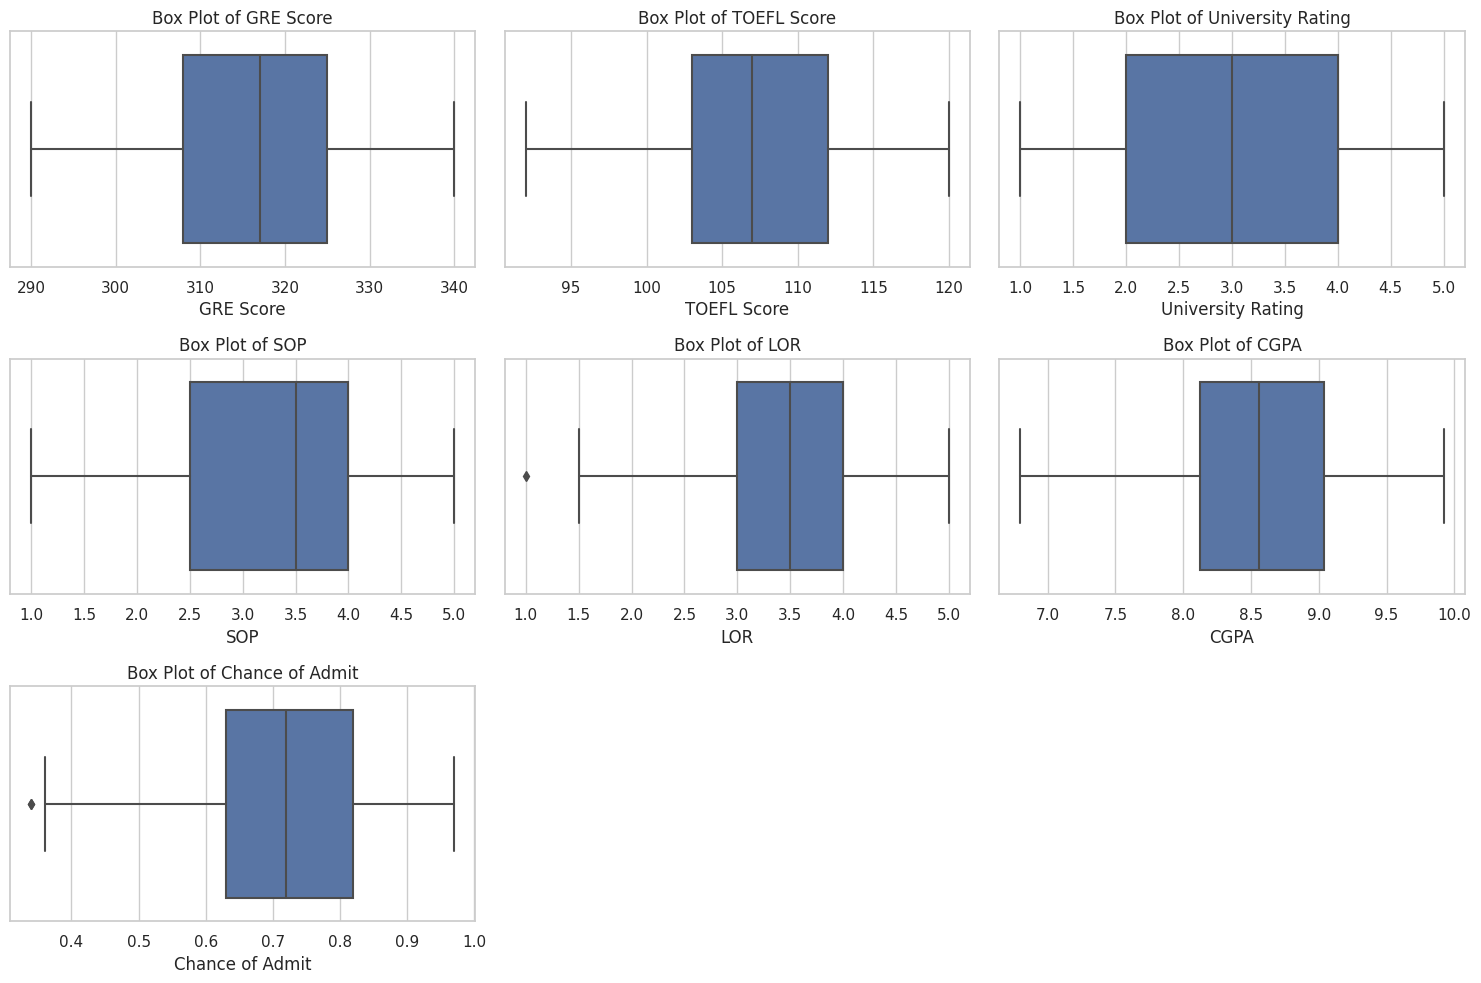

In [104]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Numerical features
numerical_features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Chance of Admit']


# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=Jamboree_Df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()



Seems like there is not outlier in Data

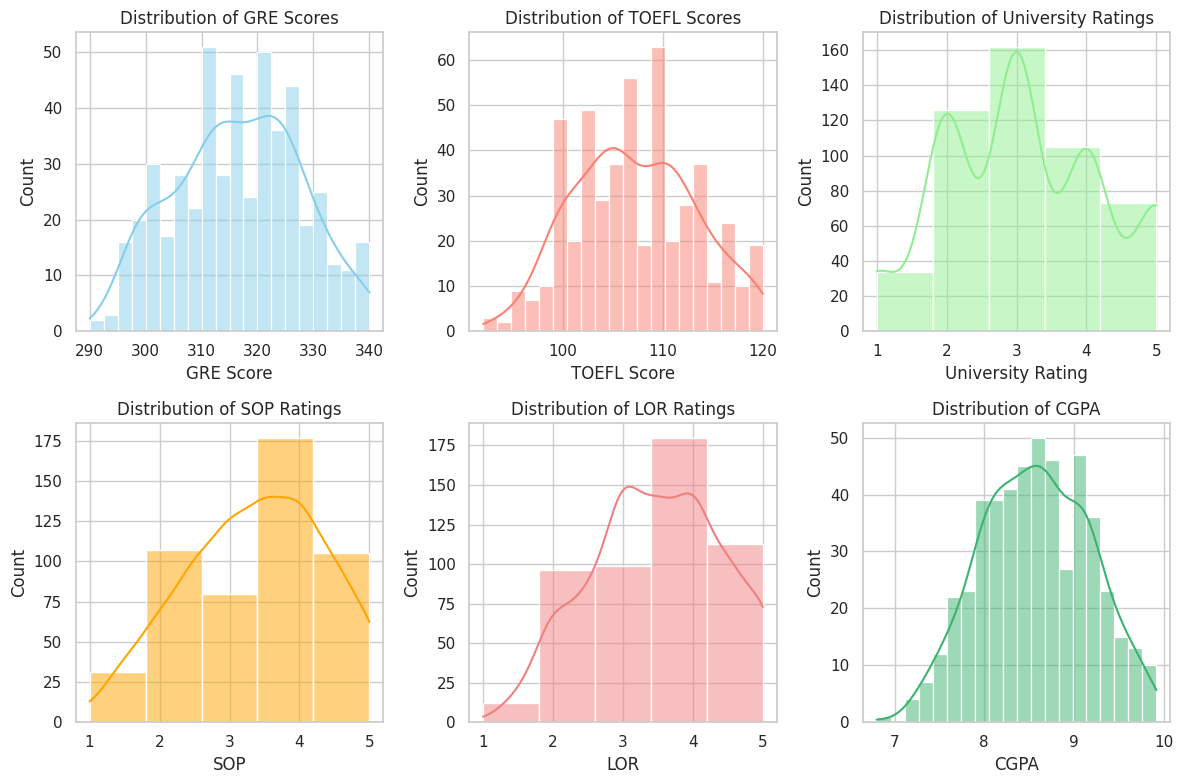

In [105]:

# Set the style for the plots
sns.set(style="whitegrid")

# Distribution plots for quantitative variables
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.histplot(Jamboree_Df['GRE Score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of GRE Scores')

plt.subplot(2, 3, 2)
sns.histplot(Jamboree_Df['TOEFL Score'], bins=20, kde=True, color='salmon')
plt.title('Distribution of TOEFL Scores')

plt.subplot(2, 3, 3)
sns.histplot(Jamboree_Df['University Rating'], bins=5, kde=True, color='lightgreen')
plt.title('Distribution of University Ratings')

plt.subplot(2, 3, 4)
sns.histplot(Jamboree_Df['SOP'], bins=5, kde=True, color='orange')
plt.title('Distribution of SOP Ratings')

plt.subplot(2, 3, 5)
sns.histplot(Jamboree_Df['LOR'], bins=5, kde=True, color='lightcoral')
plt.title('Distribution of LOR Ratings')

plt.subplot(2, 3, 6)
sns.histplot(Jamboree_Df['CGPA'], bins=20, kde=True, color='mediumseagreen')
plt.title('Distribution of CGPA')

plt.tight_layout()
plt.show()



CGPA and SOP is shows normal distributions

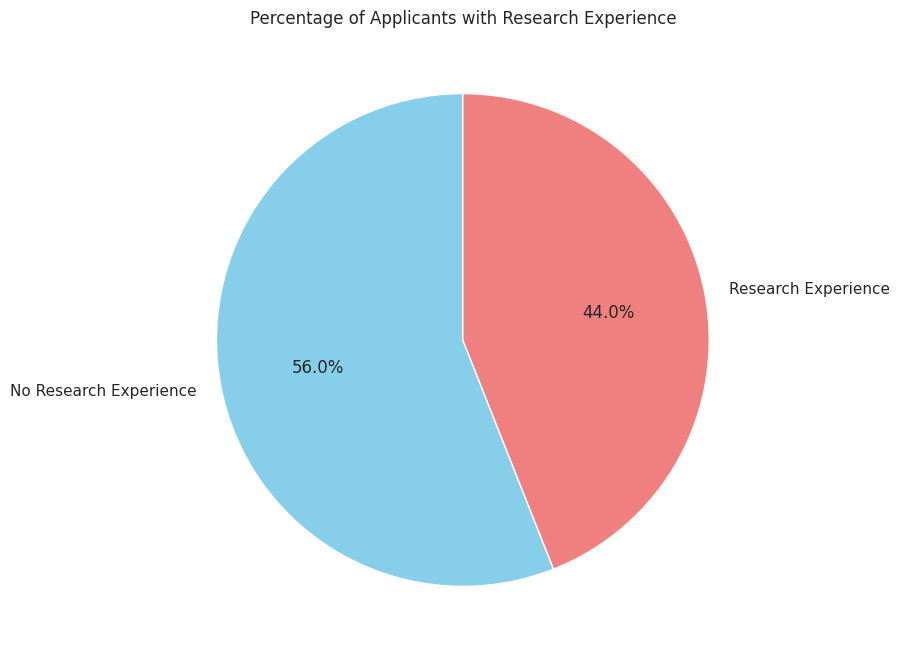

In [127]:
# Calculate the percentage of applicants with research experience
research_percentage = Jamboree_Df['Research'].value_counts(normalize=True) * 100

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(research_percentage, labels=['No Research Experience', 'Research Experience'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Percentage of Applicants with Research Experience')
plt.show()

### **C.  Bivariate Analysis**

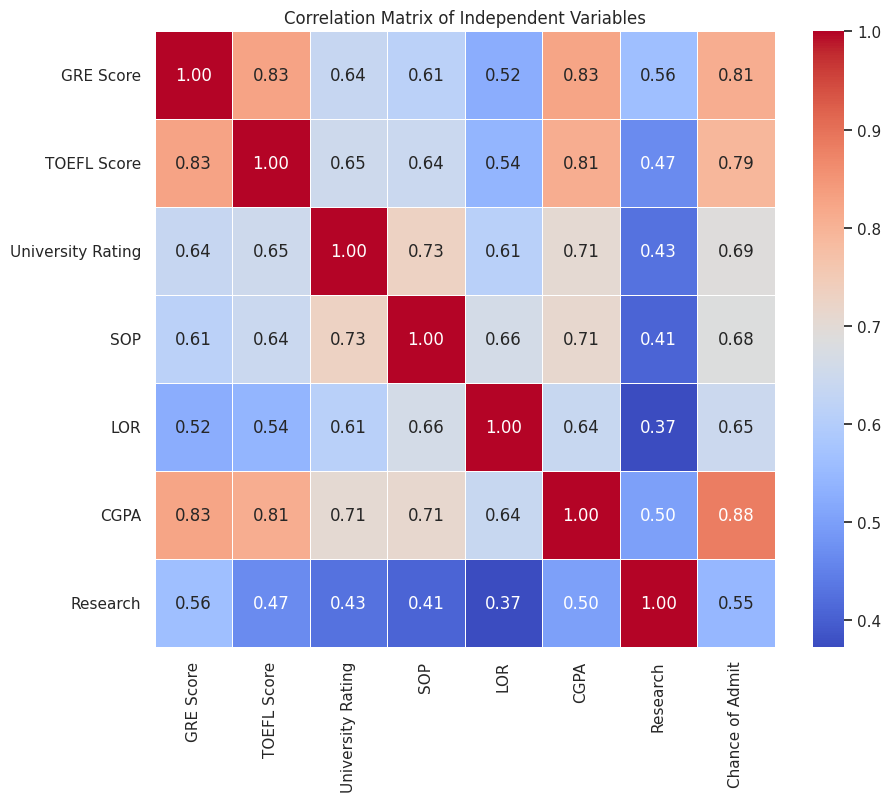

In [132]:
# If not, replace this assumption with the correct DataFrame name

# Calculate the correlation matrix
correlation_matrix = Jamboree_Df.corr().T.drop('Chance of Admit')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Independent Variables')
plt.show()


TOFEL Score , CGPA and GRE score are highly correlated to each other

Correlation with 'Chance of Admit':
Chance of Admit      1.000000
CGPA                 0.882413
GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
Research             0.545871
Name: Chance of Admit, dtype: float64


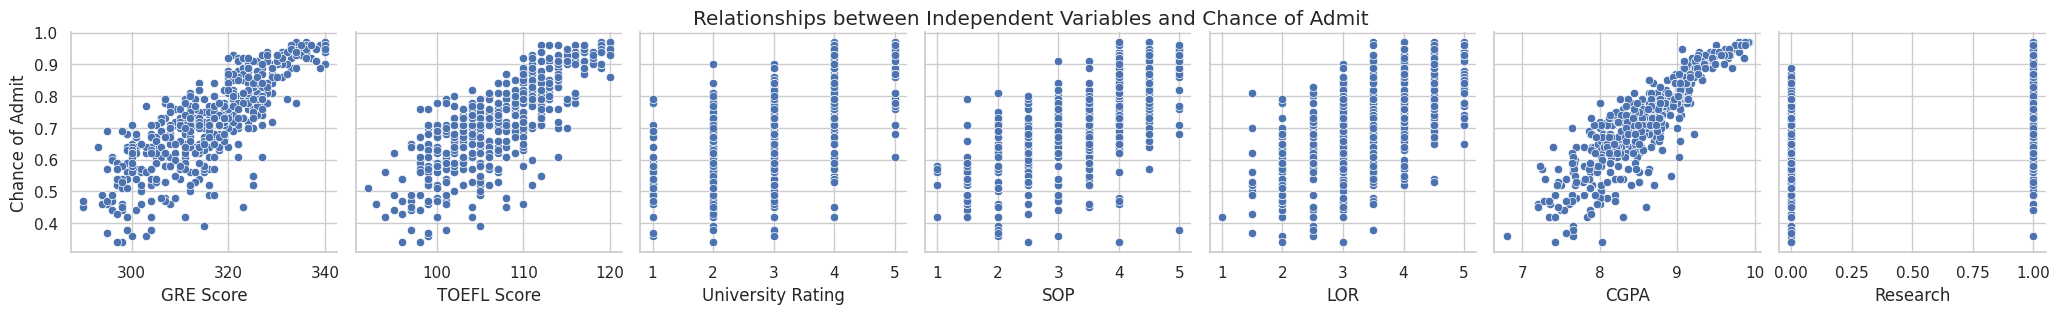

In [133]:

# Correlation between independent variables and 'Chance of Admit'
correlation_with_target = Jamboree_Df.corr()['Chance of Admit'].sort_values(ascending=False)
print("Correlation with 'Chance of Admit':")
print(correlation_with_target)

# Visualize the relationship between 'Chance of Admit' and other variables
sns.pairplot(Jamboree_Df, x_vars=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research'], y_vars=['Chance of Admit'], kind='scatter', height=3, aspect=1)
plt.suptitle('Relationships between Independent Variables and Chance of Admit', y=1.02)
plt.show()


Here also we can see TOFEL Score , CGPA and GRE score are highly correlated to each other

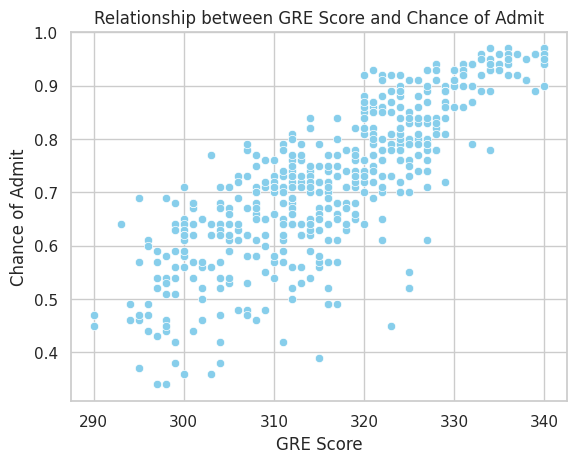

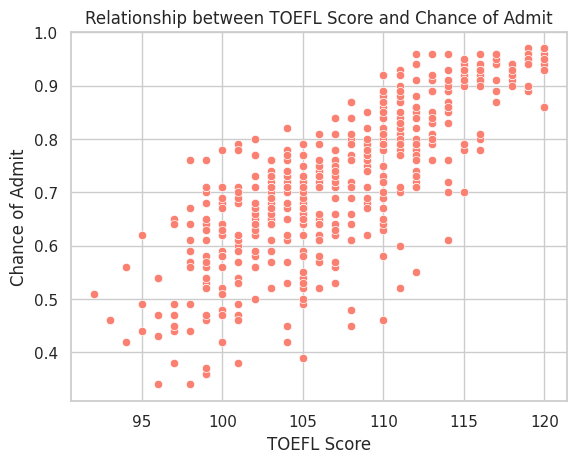

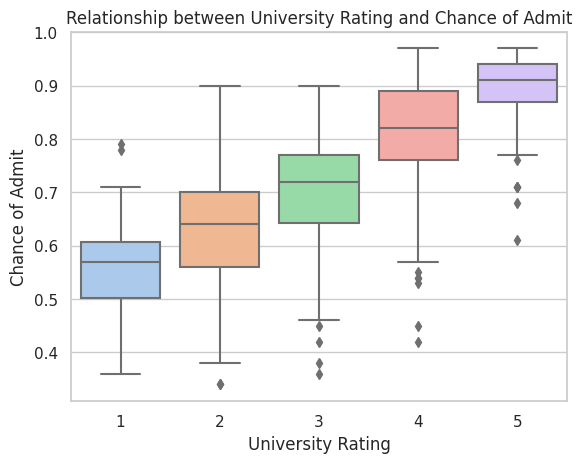

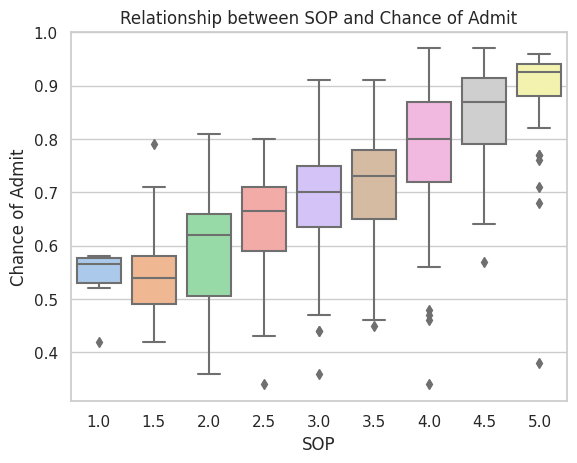

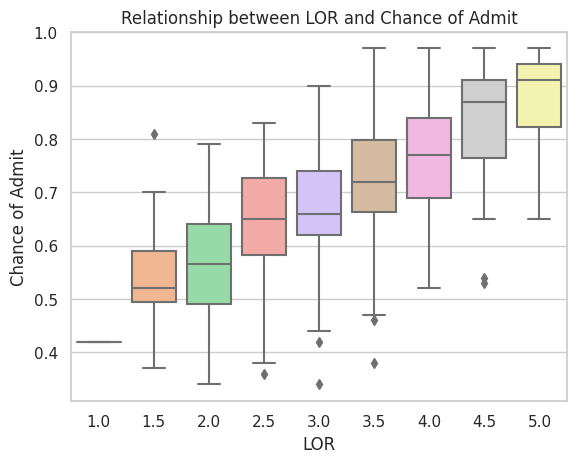

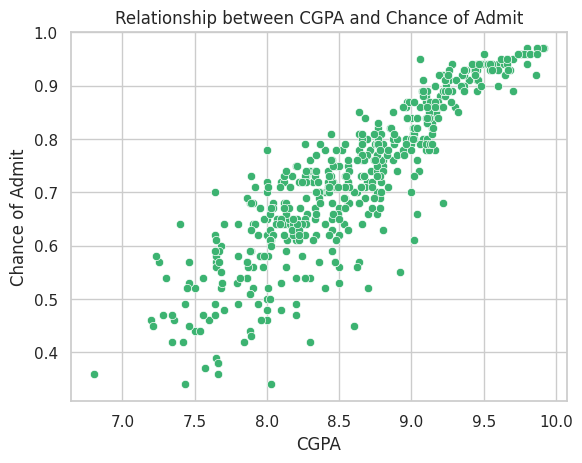

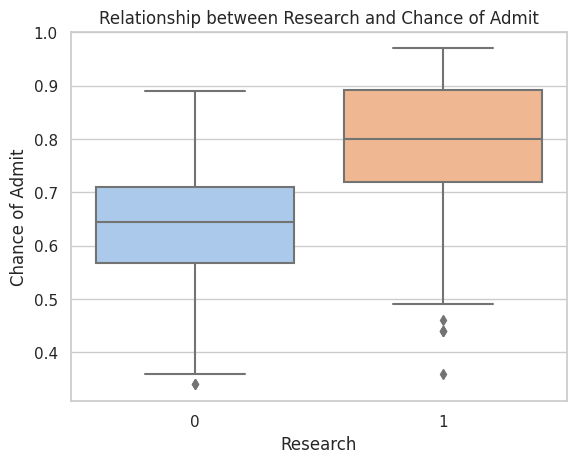

In [109]:

# Bivariate analysis - Relationships with 'Chance of Admit'

# Relationships with 'GRE Score'
sns.scatterplot(x='GRE Score', y='Chance of Admit', data=Jamboree_Df, color='skyblue')
plt.title('Relationship between GRE Score and Chance of Admit')
plt.show()

# Relationships with 'TOEFL Score'
sns.scatterplot(x='TOEFL Score', y='Chance of Admit', data=Jamboree_Df, color='salmon')
plt.title('Relationship between TOEFL Score and Chance of Admit')
plt.show()

# Relationships with 'University Rating'
sns.boxplot(x='University Rating', y='Chance of Admit', data=Jamboree_Df, palette='pastel')
plt.title('Relationship between University Rating and Chance of Admit')
plt.show()

# Relationships with 'SOP' (Statement of Purpose)
sns.boxplot(x='SOP', y='Chance of Admit', data=Jamboree_Df, palette='pastel')
plt.title('Relationship between SOP and Chance of Admit')
plt.show()

# Relationships with 'LOR' (Letter of Recommendation)
sns.boxplot(x='LOR', y='Chance of Admit', data=Jamboree_Df, palette='pastel')
plt.title('Relationship between LOR and Chance of Admit')
plt.show()

# Relationships with 'CGPA'
sns.scatterplot(x='CGPA', y='Chance of Admit', data=Jamboree_Df, color='mediumseagreen')
plt.title('Relationship between CGPA and Chance of Admit')
plt.show()

# Relationships with 'Research'
sns.boxplot(x='Research', y='Chance of Admit', data=Jamboree_Df, palette='pastel')
plt.title('Relationship between Research and Chance of Admit')
plt.show()


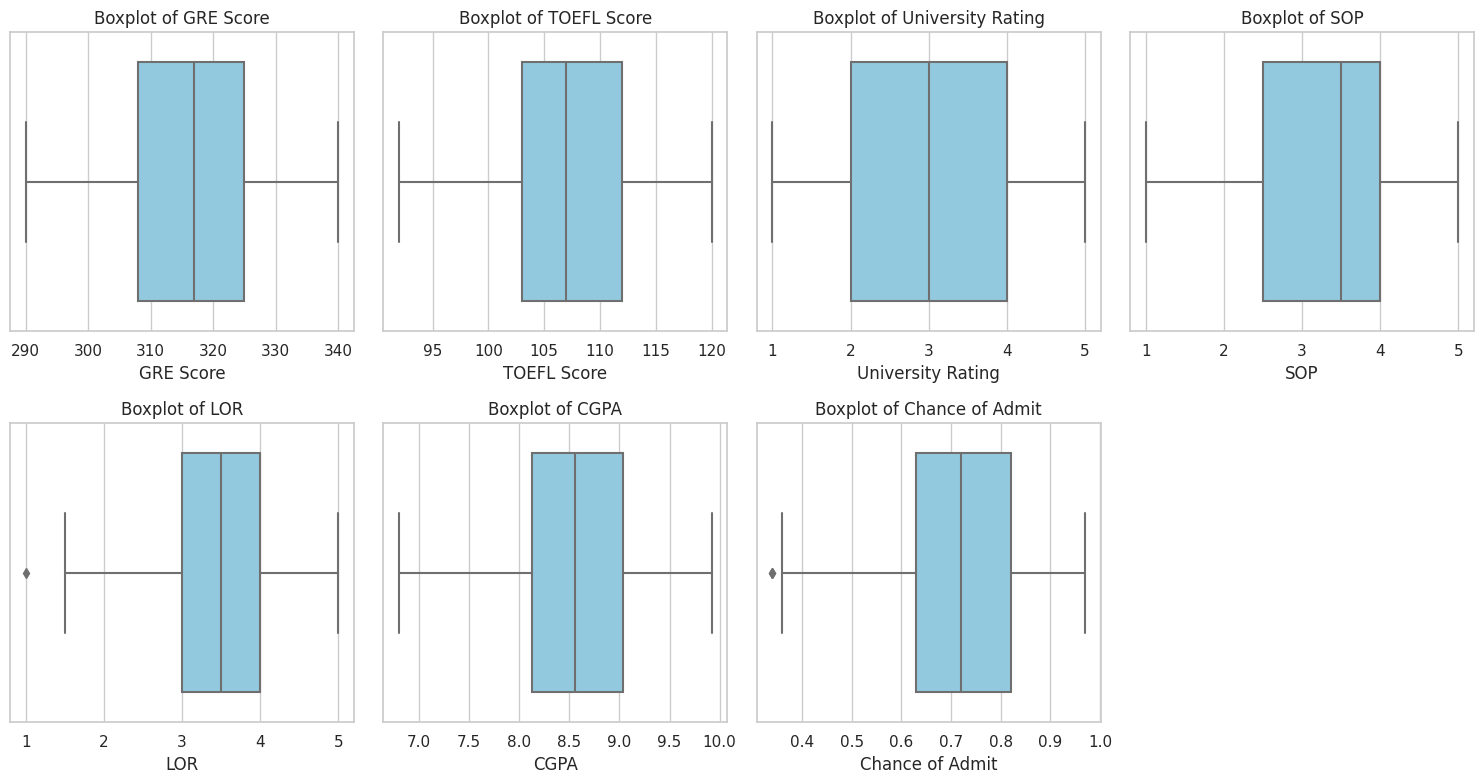

In [110]:

# Select numerical columns for outlier detection
numerical_columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Chance of Admit']

# Create box plots for numerical columns
plt.figure(figsize=(15, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=Jamboree_Df[column], color='skyblue')
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


In [111]:
# Calculate the IQR for each numerical column
Q1 = Jamboree_Df[numerical_columns].quantile(0.25)
Q3 = Jamboree_Df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify potential outliers
potential_outliers = ((Jamboree_Df[numerical_columns] < (Q1 - 1.5 * IQR)) | (Jamboree_Df[numerical_columns] > (Q3 + 1.5 * IQR)))

# Display potential outliers
print("Potential Outliers:")
potential_outliers.sum()


Potential Outliers:


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  1
CGPA                 0
Chance of Admit      2
dtype: int64

Seems data is very clean , and doesnt have petential outlier

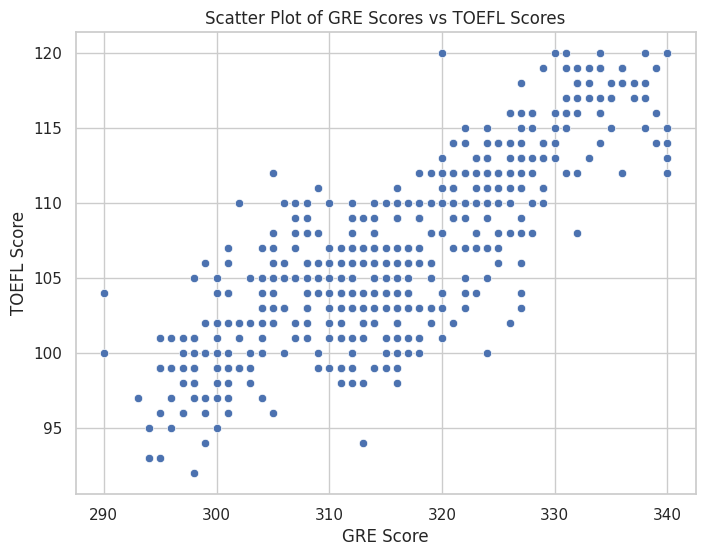

In [112]:

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GRE Score', y='TOEFL Score', data=Jamboree_Df)
plt.title('Scatter Plot of GRE Scores vs TOEFL Scores')
plt.xlabel('GRE Score')
plt.ylabel('TOEFL Score')
plt.show()


In [113]:
correlation_matrix = Jamboree_Df[['Research', 'Chance of Admit', 'LOR', 'University Rating']].corr()

# Display the correlation matrix
print(correlation_matrix)


                   Research  Chance of Admit       LOR  University Rating
Research           1.000000         0.545871  0.372526           0.427047
Chance of Admit    0.545871         1.000000  0.645365           0.690132
LOR                0.372526         0.645365  1.000000           0.608651
University Rating  0.427047         0.690132  0.608651           1.000000


## **Inferences:**

1. **Research and Chance of Admit:**
   - There is a positive correlation of approximately 0.55 between 'Research' and 'Chance of Admit'. This suggests that having research experience is moderately correlated with a higher chance of admission.

2. **Research and LOR (Letter of Recommendation):**
   - There is a positive correlation of approximately 0.37 between 'Research' and 'LOR'. This indicates a moderate positive correlation, suggesting that students with research experience may also have stronger letters of recommendation.

3. **Research and University Rating:**
   - There is a positive correlation of approximately 0.43 between 'Research' and 'University Rating'. This suggests a moderate positive correlation, indicating that students with research experience may be associated with higher-rated universities.

4. **Chance of Admit and LOR:**
   - There is a positive correlation of approximately 0.65 between 'Chance of Admit' and 'LOR'. This indicates a strong positive correlation, suggesting that applicants with higher letters of recommendation are more likely to have a higher chance of admission.

5. **Chance of Admit and University Rating:**
   - There is a positive correlation of approximately 0.69 between 'Chance of Admit' and 'University Rating'. This indicates a strong positive correlation, suggesting that applicants aiming for higher-rated universities have a higher chance of admission.

6. **LOR and University Rating:**
   - There is a positive correlation of approximately 0.61 between 'LOR' and 'University Rating'. This suggests a moderate positive correlation, indicating that applicants with stronger letters of recommendation may be associated with higher-rated universities.


# **3. Data Preprocessing**

In [114]:
# Drop the 'Serial No.' column as it is the unique row Identifier
Jamboree_Df = Jamboree_Df.drop(columns=['Serial No.'])

In [115]:
# Check for duplicate rows in the entire DataFrame
duplicate_rows = Jamboree_Df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

# Display the result
if num_duplicates == 0:
    print("No duplicate rows found in the DataFrame.")
else:
    print(f"{num_duplicates} duplicate row(s) found in the DataFrame.")

# Display the duplicate rows (if any)
if num_duplicates > 0:
    duplicate_data = Jamboree_Df[duplicate_rows]
    print("\nDuplicate Rows:")
    print(duplicate_data)


No duplicate rows found in the DataFrame.


In [116]:
# Display the initial state of the DataFrame
print("Before Categorical Encoding:")
print(Jamboree_Df.head())

# Perform one-hot encoding on the 'Research' column
Jamboree_Df_encoded = pd.get_dummies(Jamboree_Df, columns=['Research'], prefix='Research', drop_first=True)

# Display the DataFrame after encoding
print("\nAfter Categorical Encoding:")
Jamboree_Df_encoded.head()


Before Categorical Encoding:
   GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0        337          118                  4  4.5  4.5  9.65         1   
1        324          107                  4  4.0  4.5  8.87         1   
2        316          104                  3  3.0  3.5  8.00         1   
3        322          110                  3  3.5  2.5  8.67         1   
4        314          103                  2  2.0  3.0  8.21         0   

   Chance of Admit  
0             0.92  
1             0.76  
2             0.72  
3             0.80  
4             0.65  

After Categorical Encoding:


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit,Research_1
0,337,118,4,4.5,4.5,9.65,0.92,1
1,324,107,4,4.0,4.5,8.87,0.76,1
2,316,104,3,3.0,3.5,8.00,0.72,1
3,322,110,3,3.5,2.5,8.67,0.80,1
4,314,103,2,2.0,3.0,8.21,0.65,0


In [118]:
#Splitting the data_frame to get training and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and target variable (y)
X = Jamboree_Df_encoded.drop(columns=['Chance of Admit'])
y = Jamboree_Df_encoded['Chance of Admit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling/Normalization (if needed)
# For this example, let's use StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the DataFrame after data preparation
print("\nAfter Data Preparation:")
X_train.head()  # Displaying only the training set for brevity



After Data Preparation:


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_1
249,321,111,3,3.5,4.0,8.83,1
433,316,111,4,4.0,5.0,8.54,0
19,303,102,3,3.5,3.0,8.50,0
322,314,107,2,2.5,4.0,8.27,0
332,308,106,3,3.5,2.5,8.21,1


In [139]:

# If not, replace this assumption with the correct DataFrame name

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

# Split the data into features (X) and target variable (y)
X = Jamboree_Df_encoded.drop(columns=['Chance of Admit'])

# Calculate VIF for all features
vif_data = calculate_vif(X)

vif_data.head(10)


,Variable,VIF
0,GRE Score,1308.061089
1,TOEFL Score,1215.951898
2,University Rating,20.933361
3,SOP,35.265006
4,LOR,30.911476
5,CGPA,950.817985
6,Research_1,2.869493


## **Inference:**
The result shows, where VIF-based variable selection leads to the removal of almost all important features, raises a valid concern.
If a feature is crucial for the interpretation or prediction of the outcome, its removal may not be advisable.
Sometimes, features may be logically correlated, and **their removal may not be appropriate**.

Need to write here

# **4. Linear Regression model**


In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = linear_model.predict(X_test_scaled)


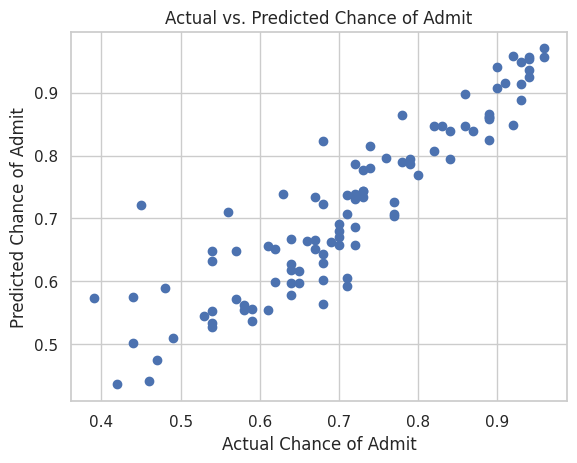

In [147]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title('Actual vs. Predicted Chance of Admit')
plt.show()


In [121]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display model statistics
print("Linear Regression Model Statistics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Linear Regression Model Statistics:
Mean Squared Error (MSE): 0.0037
R-squared (R2): 0.8188


### Linear Regression Model:
- **Mean Squared Error (MSE):** The model has a relatively low MSE of 0.0037, indicating good predictive performance on the test set.
- **R-squared (R2):** The R-squared value of 0.8188 indicates that approximately 81.88% of the variance in the target variable is explained by the model. This suggests a reasonably good fit.

### Linear Regression Model Coefficients:
- The coefficients represent the change in the target variable for a one-unit change in the corresponding feature, assuming all other features are held constant.
- Features with higher positive coefficients contribute more to the predicted chance of admission.

In [150]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Create and fit the Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Predictions on the test set for Ridge Regression
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Model evaluation for Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Display model statistics for Ridge Regression
print("\nRidge Regression Model Statistics:")
print(f"Mean Squared Error (MSE): {mse_ridge:.4f}")
print(f"R-squared (R2): {r2_ridge:.4f}")

# Print the coefficients of Ridge Regression
coefficients_ridge = ridge_model.coef_
intercept_ridge = ridge_model.intercept_

print("\nRidge Regression Model Coefficients:")
for feature, coefficient in zip(X_train_scaled, coefficients_ridge):
    print(f"{feature}: {coefficient:.4f}")

# Print the intercept
print(f"Intercept: {intercept_ridge:.4f}")



Ridge Regression Model Statistics:
Mean Squared Error (MSE): 0.0037
R-squared (R2): 0.8188

Ridge Regression Model Coefficients:
[ 0.38998634  0.6024183  -0.09829757  0.12679578  0.56498381  0.4150183
  0.89543386]: 0.0268
[-0.06640493  0.6024183   0.7754586   0.63397891  1.65149114 -0.06785154
 -1.11677706]: 0.0184
[-1.25302222 -0.87691722 -0.09829757  0.12679578 -0.52152352 -0.13445427
 -1.11677706]: 0.0030
[-0.24896144 -0.05506416 -0.97205374 -0.88757048  0.56498381 -0.51742001
 -1.11677706]: 0.0019
[-0.79663095 -0.21943477 -0.09829757  0.12679578 -1.06477718 -0.61732412
  0.89543386]: 0.0159
[-0.06640493 -0.87691722 -0.09829757 -1.39475361 -0.52152352 -1.96602954
 -1.11677706]: 0.0670
[ 0.20742983  0.10930646 -0.97205374 -0.88757048 -0.52152352  0.29846351
 -1.11677706]: 0.0119
Intercept: 0.7242


**Ridge Regression Model Coefficients:**
- The coefficients are similar to those in the Linear Regression model, with minor differences.

In [153]:

# Create and fit the Lasso Regression model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train)

# Predictions on the test set for Lasso Regression
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Model evaluation for Lasso Regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Display model statistics for Lasso Regression
print("\nLasso Regression Model Statistics:")
print(f"Mean Squared Error (MSE): {mse_lasso:.4f}")
print(f"R-squared (R2): {r2_lasso:.4f}")

# Print the coefficients of Lasso Regression
coefficients_lasso = lasso_model.coef_
intercept_lasso = lasso_model.intercept_

print("\nLasso Regression Model Coefficients:")
for feature, coefficient in zip(X_train_scaled, coefficients_lasso):
    print(f"{feature}: {coefficient:.4f}")

# Print the intercept
print(f"Intercept: {intercept_lasso:.4f}")



Lasso Regression Model Statistics:
Mean Squared Error (MSE): 0.0206
R-squared (R2): -0.0072

Lasso Regression Model Coefficients:
[ 0.38998634  0.6024183  -0.09829757  0.12679578  0.56498381  0.4150183
  0.89543386]: 0.0000
[-0.06640493  0.6024183   0.7754586   0.63397891  1.65149114 -0.06785154
 -1.11677706]: 0.0000
[-1.25302222 -0.87691722 -0.09829757  0.12679578 -0.52152352 -0.13445427
 -1.11677706]: 0.0000
[-0.24896144 -0.05506416 -0.97205374 -0.88757048  0.56498381 -0.51742001
 -1.11677706]: 0.0000
[-0.79663095 -0.21943477 -0.09829757  0.12679578 -1.06477718 -0.61732412
  0.89543386]: 0.0000
[-0.06640493 -0.87691722 -0.09829757 -1.39475361 -0.52152352 -1.96602954
 -1.11677706]: 0.0000
[ 0.20742983  0.10930646 -0.97205374 -0.88757048 -0.52152352  0.29846351
 -1.11677706]: 0.0000
Intercept: 0.7242


### Lasso Regression Model:
- Lasso Regression introduces L1 regularization, which can lead to feature selection by setting some coefficients to zero.
- The high MSE (0.0206) and negative R-squared (-0.0072) suggest that Lasso Regression may not be suitable for this dataset.

### Lasso Regression Model Coefficients:
- All coefficients are set to zero. This implies that Lasso Regression has effectively selected a subset of features and eliminated the influence of the others.

From the output, we can make the following inferences:
### Inference:
- Linear Regression and Ridge Regression perform similarly in this context, indicating that regularization may not significantly impact the model's performance.
- Lasso Regression, with all coefficients set to zero, suggests that some features may not be contributing significantly to the model and can potentially be removed.

In [154]:

# If not, replace this assumption with the correct model object

# Predictions on the test set
y_pred = linear_model.predict(X_test_scaled)

# Calculate residuals
residuals = y_test - y_pred

# Calculate the mean of residuals
mean_residuals = residuals.mean()

# Display the mean of residuals
print(f"Mean of Residuals: {mean_residuals:.4f}")


Mean of Residuals: -0.0055


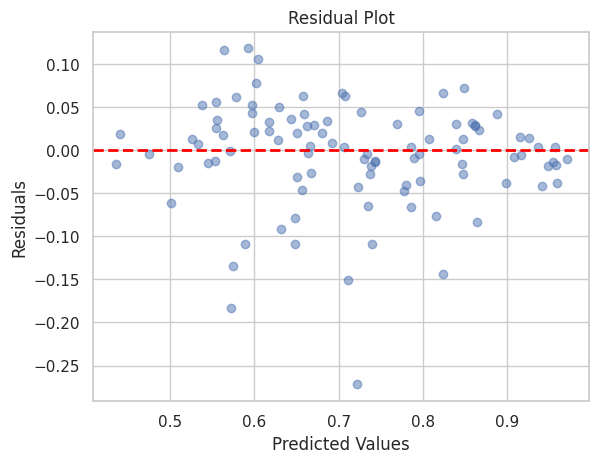

In [155]:
# Create a residual plot
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


## Inference :
The mean of residuals being close to zero (-0.0055) is generally a positive sign for a linear regression model. In linear regression, the residuals represent the differences between the observed values and the predicted values. Ideally, the mean of residuals should be close to zero, indicating that, on average, the model is not systematically overestimating or underestimating the target variable.

Shapiro-Wilk Test for Normality:
Statistic: 0.9179, p-value: 0.0000
The residuals do not appear to be normally distributed (reject the null hypothesis).


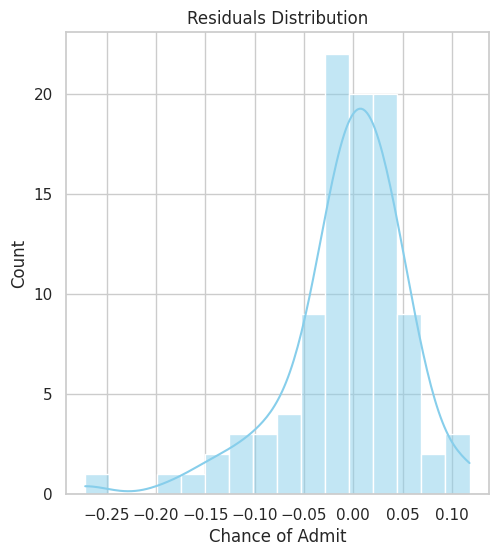

In [159]:

# Shapiro-Wilk Test for Normality
statistic, p_value = stats.shapiro(residuals)

# Visualizations
plt.figure(figsize=(12, 6))

# Residuals Distribution
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, color='skyblue')
plt.title('Residuals Distribution')


# Print Shapiro-Wilk test results
print(f'Shapiro-Wilk Test for Normality:')
print(f'Statistic: {statistic:.4f}, p-value: {p_value:.4f}')

# Interpretation of the test results
if p_value > 0.05:
    print('The residuals appear to be normally distributed (fail to reject the null hypothesis).')
else:
    print('The residuals do not appear to be normally distributed (reject the null hypothesis).')


# **5. Assumptions of linear regression:**
    a. Mean of residuals

    b. Linearity of variables (no pattern in residual plot)

    c. Test for Homoscedasticity

    d. Normality of residuals

a. Mean of residuals

In [165]:
residuals = y_test - y_pred   # Replace y_pred_lasso with your predicted values

# Calculate the mean of residuals
mean_residuals = residuals.mean()

# Display the mean of residuals
print(f"Mean of Residuals: {mean_residuals:.4f}")


Mean of Residuals: -0.0055


b. Linearity of variables (no pattern in residual plot)

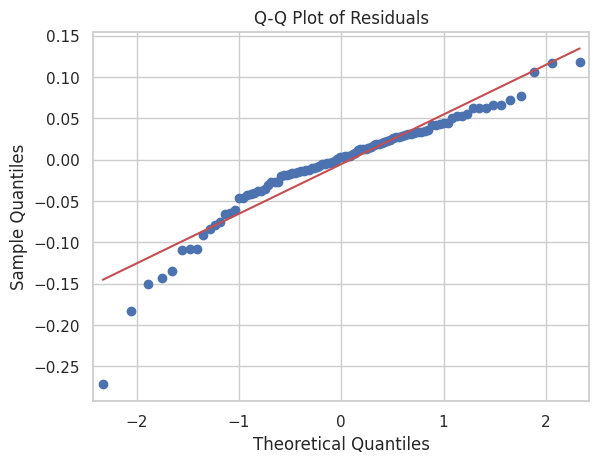

In [158]:
# Calculate residuals
residuals = y_test - y_pred

# Q-Q plot for normality of residuals
sm.qqplot(residuals, line='r')
plt.title('Q-Q Plot of Residuals')
plt.show()

c. Test for Homoscedasticity

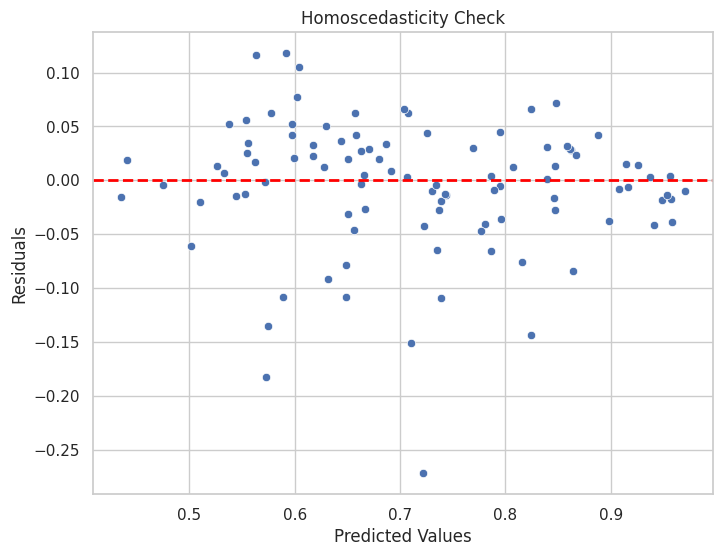

In [163]:

import statsmodels.api as sm

predicted_values = y_pred

# Scatter plot of residuals vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predicted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # Add a horizontal line at y=0 for reference
plt.title('Homoscedasticity Check')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


d. Normality of residuals

<Axes: xlabel='Chance of Admit', ylabel='Density'>

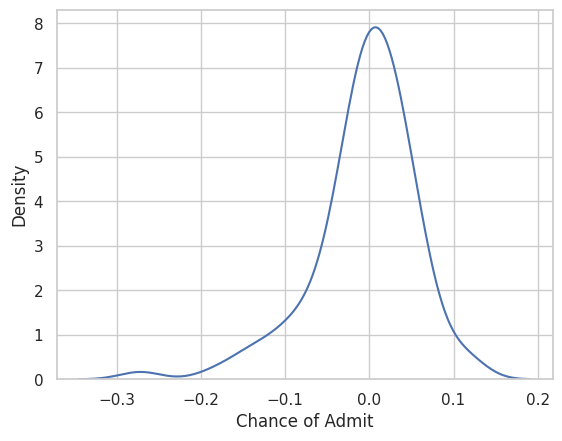

In [166]:

sns.kdeplot(residuals)

In [168]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions on the training set
y_train_pred = linear_model.predict(X_train_scaled)

# Predictions on the test set
y_test_pred = linear_model.predict(X_test_scaled)

# Calculate metrics for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# Print metrics for training set
print('Training Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_train:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_train:.4f}')
print(f'R-squared (R2): {r2_train:.4f}')
print()

# Print metrics for test set
print('Test Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_test:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.4f}')
print(f'R-squared (R2): {r2_test:.4f}')


Training Set Metrics:
Mean Absolute Error (MAE): 0.0425
Root Mean Squared Error (RMSE): 0.0594
R-squared (R2): 0.8211

Test Set Metrics:
Mean Absolute Error (MAE): 0.0427
Root Mean Squared Error (RMSE): 0.0609
R-squared (R2): 0.8188


R-squared (R2) and Adjusted R-squared are both metrics used to evaluate the goodness of fit of a regression model. However, Adjusted R-squared addresses some limitations of R-squared, especially when dealing with multiple independent variables. Here's the difference between R-squared and Adjusted R-squared:

1. **R-squared (R2):**
   - R-squared is a measure of the proportion of the variance in the dependent variable that is explained by the independent variables in the model.
   - It ranges from 0 to 1, where 0 indicates that the model does not explain any variability, and 1 indicates that the model explains all the variability.
   - R-squared tends to increase as more independent variables are added, even if they do not contribute significantly to explaining the variance. This is a limitation when dealing with multiple predictors.

2. **Adjusted R-squared:**
   - Adjusted R-squared takes into account the number of independent variables in the model and penalizes the addition of unnecessary variables that do not contribute significantly to the explanation of variance.
   - It provides a more accurate measure of the goodness of fit when there are multiple predictors.
   - Adjusted R-squared can be negative if the model is worse than a simple mean-based model.

In your provided metrics:
- **R-squared (R2):**
  - Training Set: 0.8211
  - Test Set: 0.8188

These values indicate the proportion of the variance in the dependent variable explained by the independent variables in your model. Higher values suggest a better fit.

It's important to note that while R-squared can be useful, it should be interpreted alongside other metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) for a more comprehensive evaluation of the model's performance. Additionally, Adjusted R-squared may be more informative in the context of multiple predictors.

Mean Squared Error (MSE):

MSE is a metric that measures the average squared difference between predicted values and actual values.
It provides a measure of the overall accuracy of a regression model.
MSE is calculated by taking the average of the squared differences between each predicted value and its corresponding actual value.

Mean Absolute Error (MAE):

MAE is a metric that measures the average absolute difference between predicted values and actual values.
It provides a measure of the average magnitude of errors, regardless of their direction (overestimation or underestimation).
MAE is calculated by taking the average of the absolute differences between each predicted value and its corresponding actual value.
    
Now, relating these to Jamboree metrics:

Training Set Metrics:

Mean Absolute Error (MAE): 0.0425
Root Mean Squared Error (RMSE): 0.0594
Test Set Metrics:

Mean Absolute Error (MAE): 0.0427
Root Mean Squared Error (RMSE): 0.0609

These values represent the average absolute difference and the average squared difference between predicted and actual values, providing insights into the accuracy and precision of your regression model. Lower values indicate better performance for both MAE and RMSE.

In [167]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions on the test set
y_pred = linear_model.predict(X_test_scaled)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = len(y_test)
p = X_test_scaled.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print metrics
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R2): {r2:.4f}')
print(f'Adjusted R-squared (Adj R2): {adj_r2:.4f}')


Mean Absolute Error (MAE): 0.0427
Root Mean Squared Error (RMSE): 0.0609
R-squared (R2): 0.8188
Adjusted R-squared (Adj R2): 0.8051


The model has a reasonably low MAE and RMSE, indicating good predictive performance.

The R-squared value suggests that the included features collectively explain a substantial portion of the variability in the chance of admission.

Features such as CGPA, Research Experience, and other academic scores appear to be important predictors in the model.

In [171]:

# Calculate the correlation coefficient
correlation_coefficient = Jamboree_Df['GRE Score'].corr(Jamboree_Df['TOEFL Score'])

# Display the correlation coefficient
print(f"Correlation Coefficient between GRE Scores and TOEFL Scores: {correlation_coefficient:.4f}")

Correlation Coefficient between GRE Scores and TOEFL Scores: 0.8272


In [178]:
# @title
import pandas as pd
from sklearn.linear_model import LinearRegression


# If not, replace this assumption with the correct data preparation and model training

# Function to get user inputs
def get_user_inputs():
    print("Enter the following information:")
    gre_score = float(input("GRE Score (out of 340): "))
    toefl_score = float(input("TOEFL Score (out of 120): "))
    university_rating = float(input("University Rating (out of 5): "))
    sop = float(input("Statement of Purpose (SOP, out of 5): "))
    lor = float(input("Letter of Recommendation (LOR, out of 5): "))
    cgpa = float(input("Undergraduate GPA (CGPA, out of 10): "))
    research = int(input("Research Experience (0 for No, 1 for Yes): "))

    # Create a dictionary with user inputs
    user_data = {
        'GRE Score': gre_score,
        'TOEFL Score': toefl_score,
        'University Rating': university_rating,
        'SOP': sop,
        'LOR': lor,
        'CGPA': cgpa,
        'Research': research
    }

    return pd.DataFrame([user_data])

# Get user inputs
user_inputs_df = get_user_inputs()

# Use the model to make predictions
user_prediction = linear_model.predict(user_inputs_df)

# Display the predicted chance of admit
print(f"\nPredicted Chance of Admit: {user_prediction[0]:.4f}")


Enter the following information:
GRE Score (out of 340): 300
TOEFL Score (out of 120): 100
University Rating (out of 5): 4
Statement of Purpose (SOP, out of 5): 3
Letter of Recommendation (LOR, out of 5): 4
Undergraduate GPA (CGPA, out of 10): 9
Research Experience (0 for No, 1 for Yes): 1

Predicted Chance of Admit: 11.2487


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [172]:

# Calculate the correlation coefficient
correlation_coefficient = Jamboree_Df['CGPA'].corr(Jamboree_Df['LOR'])

# Display the correlation coefficient
print(f"Correlation Coefficient between CGPA and LOR: {correlation_coefficient:.4f}")


Correlation Coefficient between CGPA and LOR: 0.6375


In [169]:
from sklearn.model_selection import cross_val_score, KFold



# Specify the number of folds for cross-validation
k_folds = 5  # You can adjust this value based on your preference

# Use KFold for cross-validation splitting strategy
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform cross-validation and obtain R-squared scores
cv_scores = cross_val_score(linear_model, X_scaled, y, scoring='r2', cv=kf)

# Print R-squared scores for each fold
print("Cross-Validation R-squared Scores:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f}")

# Print the mean R-squared score across all folds
mean_cv_score = np.mean(cv_scores)
print(f"\nMean Cross-Validation R-squared Score: {mean_cv_score:.4f}")


Cross-Validation R-squared Scores:
Fold 1: 0.8188
Fold 2: 0.7850
Fold 3: 0.8148
Fold 4: 0.7614
Fold 5: 0.8774

Mean Cross-Validation R-squared Score: 0.8115


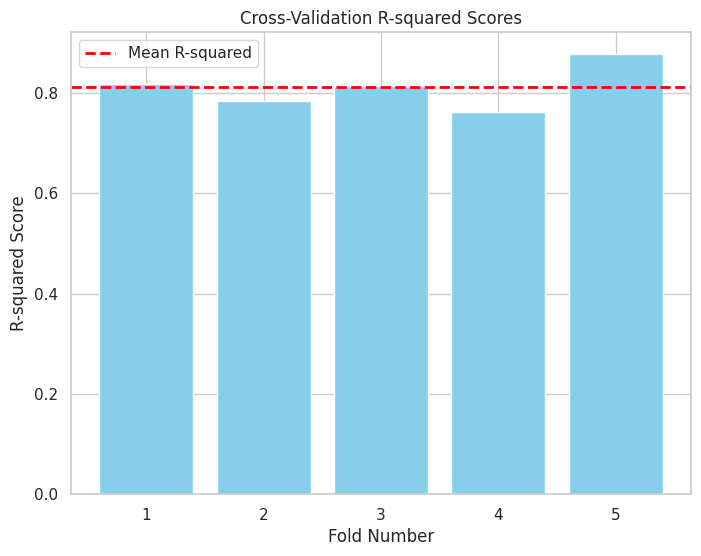

In [179]:

cv_scores = [0.8188, 0.7850, 0.8148, 0.7614, 0.8774]  # Replace with your actual scores

# Plotting the R-squared scores for each fold
plt.figure(figsize=(8, 6))
plt.bar(range(1, k_folds + 1), cv_scores, color='skyblue')
plt.xlabel('Fold Number')
plt.ylabel('R-squared Score')
plt.title('Cross-Validation R-squared Scores')
plt.axhline(np.mean(cv_scores), color='red', linestyle='dashed', linewidth=2, label='Mean R-squared')
plt.legend()
plt.show()


# **6. Business Insights**

Here are potential business insights that could be derived from the Jamboree_Df dataset:

1. The model demonstrates good predictive performance and generalization, as the metrics are consistent between the training and test sets.
2. The differences between the training and test set metrics are minimal, suggesting that the model is not overfitting or underfitting.

3. **Mean Absolute Error (MAE):**
   - The MAE values are relatively low for both the training and test sets (around 0.0425 and 0.0427, respectively). This indicates that, on average, the model's predictions are close to the actual values.

4. **Root Mean Squared Error (RMSE):**
   - The RMSE values are also relatively low for both sets (around 0.0594 for training and 0.0609 for test). This suggests that the model's predictions have low dispersion and are close to the actual values.

5. **R-squared (R2):**
   - The R2 values are around 0.8211 for training and 0.8188 for test. These values indicate that a substantial portion of the variance in the target variable is explained by the model.

5. **Identifying Admission Criteria:**
   - Determine which factors (GRE scores, TOEFL scores, GPA, etc.) most strongly influence the chance of admission.

   Top 3 Correlated Features with Chance of Admit:

   **CGPA           0.882413**

  **GRE Score      0.810351**

   **TOEFL Score    0.792228**
   
   This insight can help Jamboree guide students on prioritizing areas for improvement in their applications.

6. **Effect of Research Experience:**
   - Student having research experience is moderately correlated with a higher chance of admission. This insight could inform Jamboree's advice to students considering research opportunities or highlight the importance of research in the admission process.




# **7. Recommendations**

Here are some recommendations for the Jamboree management team based on the context of predicting graduate admission chances:

1. **User-Friendly Interface:**
   - Develop a user-friendly interface for the admission prediction feature on the Jamboree website. The interface should be intuitive and easily navigable for users to input their information and receive predictions.

2. **Educational Content:**
   - Provide educational content alongside the prediction feature. This content can include information about the factors influencing admission chances, tips for improving application profiles, and guidance on addressing potential weaknesses.

3. **Transparent Communication:**
   - Clearly communicate the limitations of the admission prediction model to users. Emphasize that predictions are based on historical data and that individual outcomes may vary. This transparency builds trust and manages user expectations.

4. **Data Privacy and Security:**
   - Prioritize data privacy and security. Clearly communicate how user data will be used, stored, and protected. Implement robust security measures to safeguard user information.

5. **Feedback Mechanism:**
   - Establish a feedback mechanism for users to provide comments or suggestions about the prediction feature. Use this feedback to continuously improve the tool and address user concerns.

6. **Marketing and Outreach:**
   - Effectively market the admission prediction feature to reach a wider audience. Consider targeted outreach to high school students, college graduates, and professionals considering further education.

7. **Integration with Jamboree Services:**
   - Integrate the admission prediction feature seamlessly with other Jamboree services. For example, link users to relevant preparation courses or consultation services based on their prediction results.

8. **Regular Updates and Communications:**
   - Keep users informed about updates, improvements, or changes to the admission prediction model. Regularly communicate with users through newsletters, blogs, or social media to maintain engagement.

9. **Analytics and Reporting:**
    - Implement analytics tools to track user interactions with the admission prediction feature. Use this data to analyze user behavior, identify trends, and make informed decisions about future enhancements.

These recommendations focus on enhancing the user experience, building trust, and aligning the prediction tool with broader business goals and services offered by Jamboree.